In [1]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# from sklearn import preprocessing
# dnase_matrix_scaled = preprocessing.scale(dnase_matrix,axis=0)

In [2]:
dnase_matrix = np.loadtxt('/srv/scratch/wychen66/get_correlation/dnase_outputs/second_try/final_dnase_matrix.txt',dtype=float)
print(dnase_matrix.shape) # file indeed has 122 columns (awk '{print NF}' file | sort -nu | tail -n 1)
dnase_transpose = np.transpose(dnase_matrix)
print('orignal dimensions:', dnase_transpose.shape)

# bios_eid_for_dnase_matrix is the column labels for final_dnase_matrix.txt
dnase_bios_labels=[]
dnase_bios_labels_set=set()
with open('/srv/scratch/wychen66/get_correlation/dnase_outputs/second_try/bios_eid_for_final_dnase_matrix.txt','r') as f1: 
    for l1 in f1:
        items = l1.strip().split('\t')
        dnase_bios_labels.append(items[0])
        dnase_bios_labels_set.add(items[0])
f1.close()
print('dnase bios labels:',len(dnase_bios_labels)) # all unique too 
np.savetxt('/srv/scratch/wychen66/get_correlation/dnase_outputs/second_try/bios_column_label_for_final_dnase_matrix.txt', dnase_bios_labels, fmt="%s")    

(762379, 122)
orignal dimensions: (122, 762379)
dnase bios labels: 122


In [6]:
# below is pca analysis
# normalize over sequencing depth
col_sum = np.sum(dnase_transpose,axis=1)
col_sum = col_sum.reshape(col_sum.shape[0],-1) # from (122,) to (122,1)
dnase_transpose_depth_normalized = np.arcsinh(1000000* np.divide(dnase_transpose,col_sum))

pca = PCA(n_components=2)
pca.fit(dnase_transpose_depth_normalized) # fit model to data
dnase_pca = pca.transform(dnase_transpose_depth_normalized) # reduce dimensions
print('reduced dimensions:', dnase_pca.shape)

# make vector of labels
pca_labels =[]
with open('/srv/scratch/wychen66/get_correlation/dnase_outputs/second_try/pca_labels.txt','r') as f1: 
    for l1 in f1:
        l1=l1.strip().replace('\n','')
        pca_labels.append(l1)
f1.close()
print(len(pca_labels))
print(pca_labels[0:4])

# make vector of colors
color_list=[]
with open('/srv/scratch/wychen66/get_correlation/dnase_outputs/second_try/pca_color_codes.txt','r') as f2: 
    for l2 in f2:
        l2=l2.strip().replace('\n','')
        color_list.append(l2)
f2.close()
print(len(color_list))
print(color_list[0:4])

122
['Blood', 'Blood', 'Blood', 'ES-derived']
122
['#008000', '#008000', '#27AE60', '#4178AE']


pca variance ratio: [ 0.19410897  0.1116599 ]


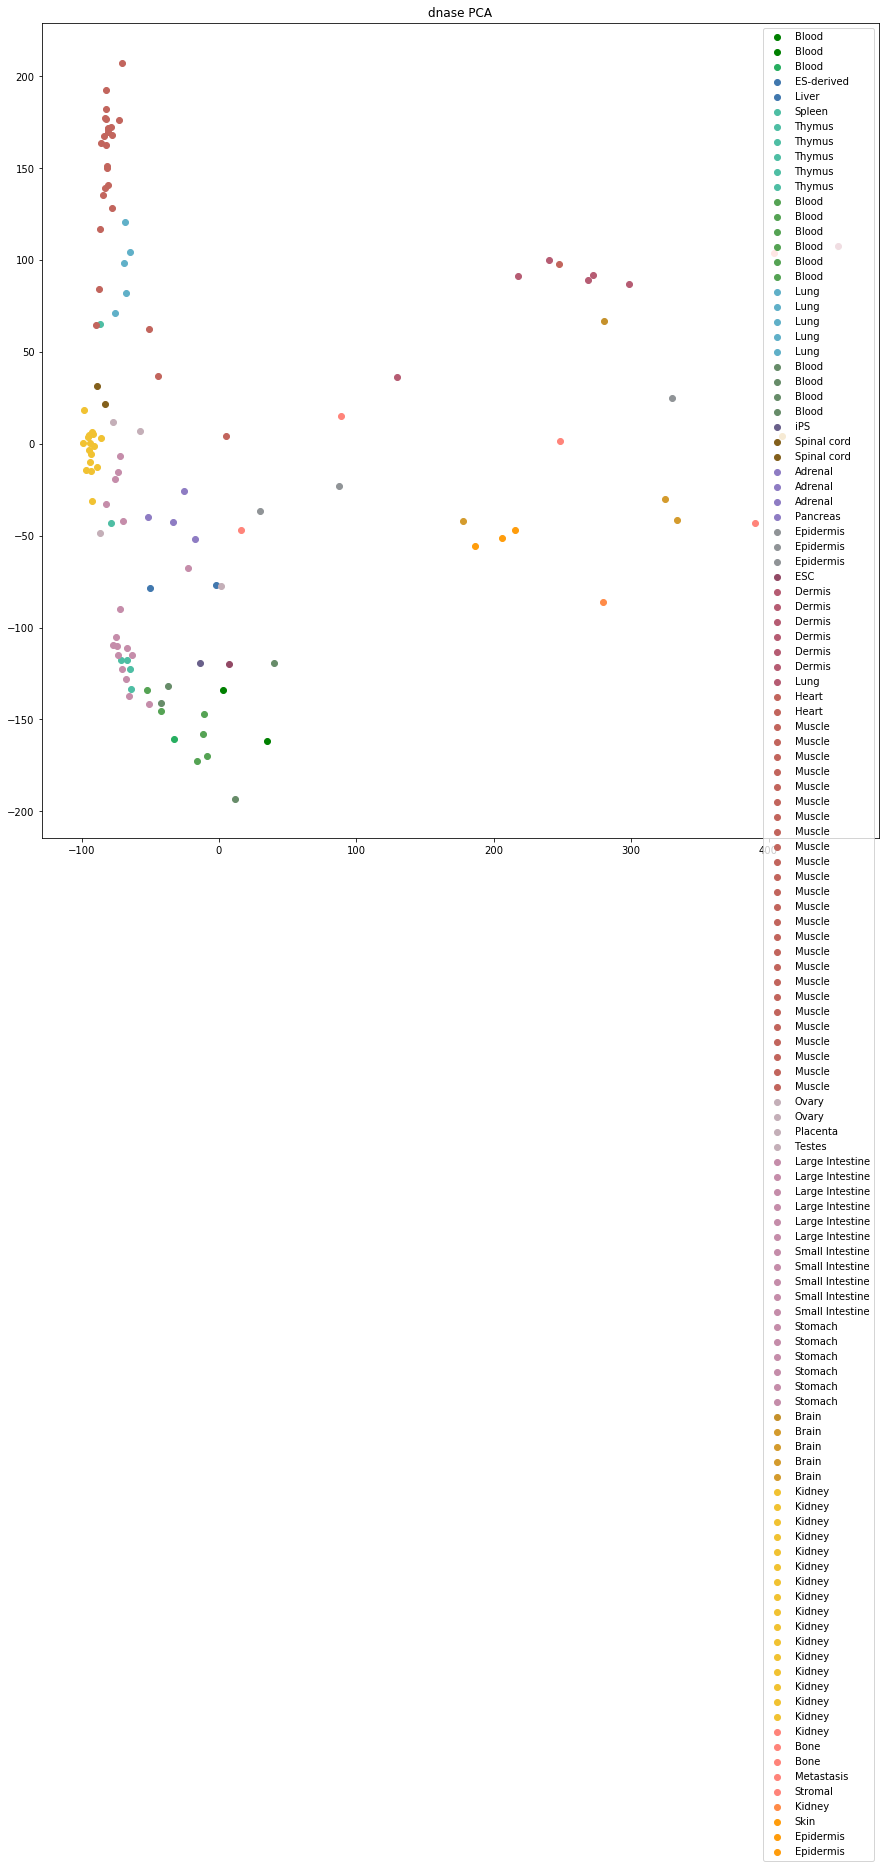

In [8]:
# plot PCA output (2)
cell_n = np.arange(len(pca_labels))
print('pca variance ratio:', pca.explained_variance_ratio_)

plt.figure(figsize=(15, 15))

for i, c, cell_label in zip(cell_n, color_list, pca_labels): 
    plt.scatter(dnase_pca[i, 0], dnase_pca[i, 1], color=c, label=cell_label)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('dnase PCA')
plt.show()

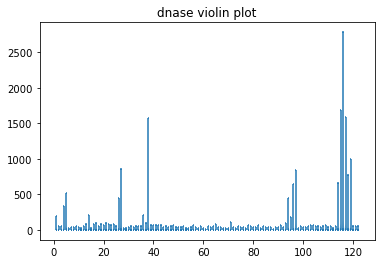

In [9]:
# attempt at viollin plot: https://matplotlib.org/examples/statistics/violinplot_demo.html
pos = np.arange(dnase_matrix.shape[1]) + 1
data = dnase_matrix
plt.plot(nrows=5, ncols=5,figsize=(10,10))
plt.violinplot(data, pos, points=20, widths=1, showmeans=True, showextrema=True, showmedians=True)

plt.title('dnase violin plot')
plt.show()

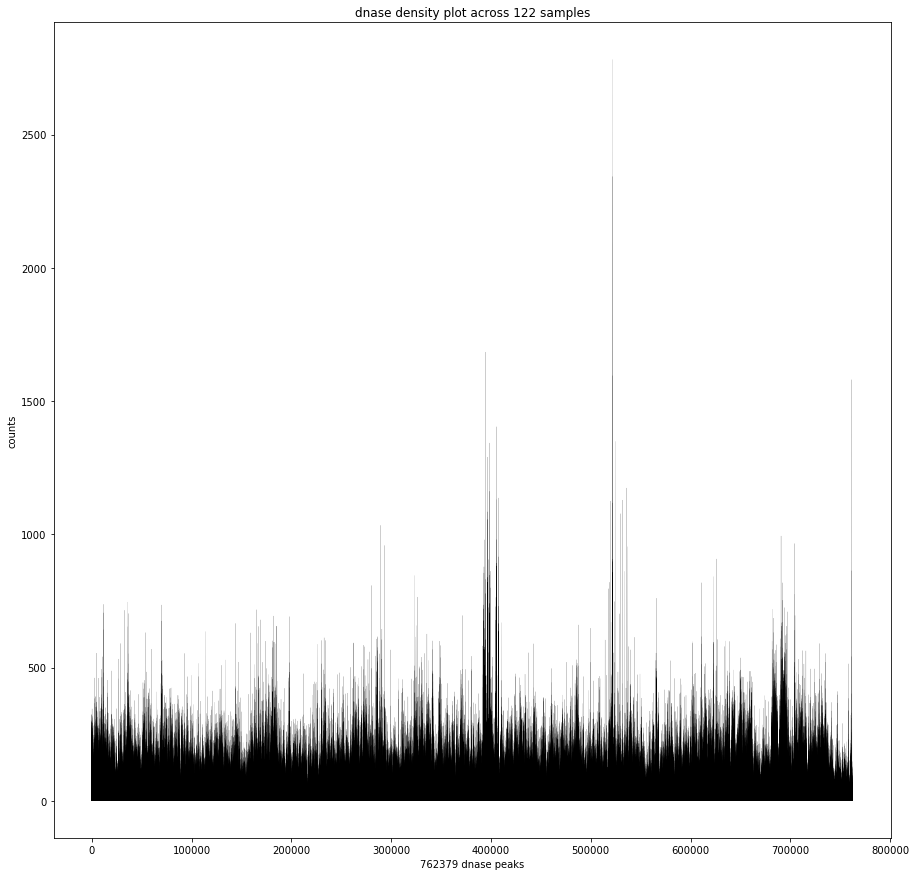

In [10]:
# density plot across ~ 100 samples overlaid on eachother
x = np.arange(dnase_matrix.shape[0])

y = []
for i in np.arange(dnase_matrix.shape[1]):
    y.append(dnase_matrix[:,i])

y = np.transpose(y)

plt.figure(figsize=(15, 15))
plt.plot(x,y,'k',linewidth=0.1)
plt.title('dnase density plot across 122 samples')
plt.xlabel('762379 dnase peaks')
plt.ylabel('counts')
plt.show()

dnase_matrix shape: (762379, 122)
matrix maximum: 2781.8   matrix minimum: 0.0


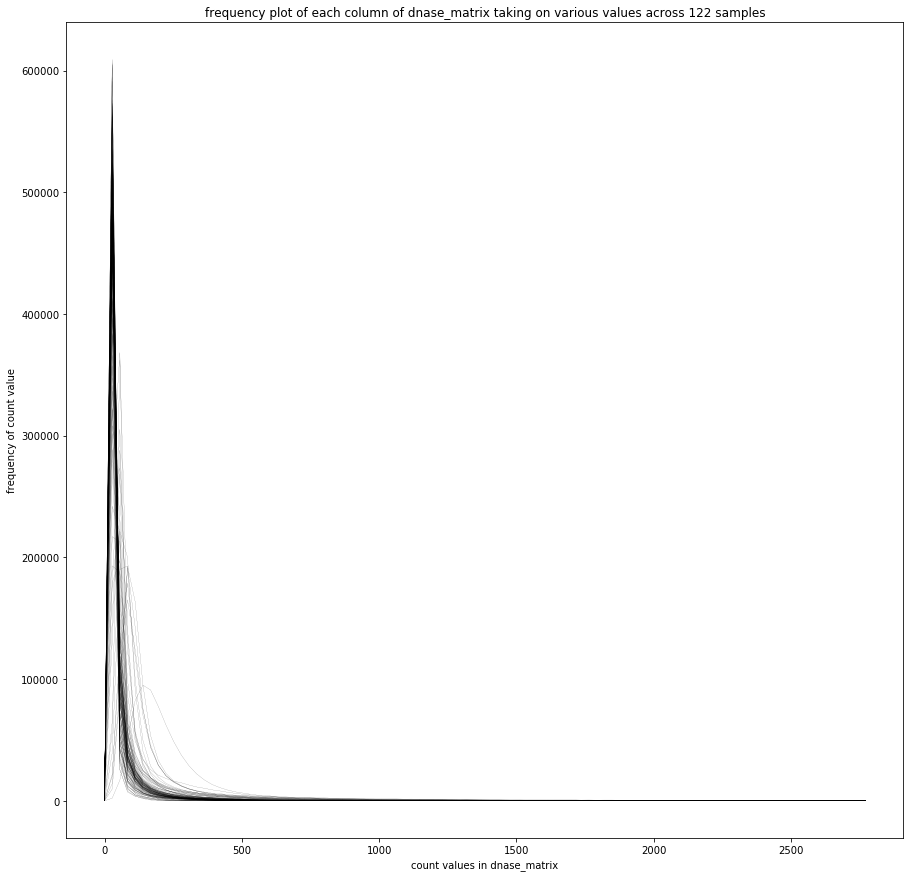

In [11]:
# make frequency plot of each column of dnase_matrix taking on various values
print('dnase_matrix shape:',dnase_matrix.shape)
print('matrix maximum:',np.amax(dnase_matrix), '  matrix minimum:',np.amin(dnase_matrix))

freq_matrix = np.zeros([122,100])
tick_marks = np.linspace(-1, 2800, 101)

for sample in np.arange(122):
    left_tick = 0
    right_tick = 1
    for frame in np.arange(100):
        freq_matrix[sample,frame] = ((left_tick < dnase_matrix[:,sample]) & (dnase_matrix[:,sample] < right_tick)).sum()
        left_tick += 1
        right_tick += 1
x = tick_marks[0:100]
y = np.transpose(freq_matrix)

plt.figure(figsize=(15, 15))
plt.plot(x,y,'k',linewidth=0.1)
plt.title('frequency plot of each column of dnase_matrix taking on various values across 122 samples')
plt.xlabel('count values in dnase_matrix')
plt.ylabel('frequency of count value')
plt.show()

In [12]:
# look into python module: pickle

# for PCA:
# calculate coefficient of variation: gives variance of each peak divided by its mean
# look at distribution, put some cutoff to select peaks that are really variable

# also try:
# for each sample, make it sum to 1 - lazy version to quantile normalize
